In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
#Load Dataset
df = pd.read_csv("./Dataset/bank-additional-full.csv", sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  

In [30]:
df_encoded.isnull().sum().tail()

day_of_week_tue         0
day_of_week_wed         0
poutcome_nonexistent    0
poutcome_success        0
y_yes                   0
dtype: int64

In [15]:
print(df['y'].value_counts(normalize=True))

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [11]:
X = df_encoded.drop('y_yes', axis = 1)
y = df_encoded['y_yes']

In [19]:
# train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (32950, 53)
Test shape: (8238, 53)


# Decision Tree Model Training

In [20]:
# 1. Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 2. Predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# 3. Metrics
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_proba_dt))

Decision Tree Report:
               precision    recall  f1-score   support

       False       0.94      0.94      0.94      7310
        True       0.53      0.54      0.54       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.89      0.89      8238

Decision Tree ROC-AUC: 0.7410455681871787


# Tree Ensemble Method - Random Forest (Bagging)

In [21]:
# 1. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 3. Metrics
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7310
        True       0.67      0.49      0.56       928

    accuracy                           0.92      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.92      0.91      8238

Random Forest ROC-AUC: 0.9473620512760035


# Tree Ensemble Method - XGBOOST (Boosting)

In [25]:
#  XGBoost 
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1,
                    eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

D:\PYTHON_PROJECT\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:51:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
               precision    recall  f1-score   support

       False       0.95      0.97      0.96      7310
        True       0.69      0.56      0.62       928

    accuracy                           0.92      8238
   macro avg       0.82      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238

XGBoost ROC-AUC: 0.9545743608189066


# Tree Ensemble Method - AdaBoost (Boosting)

In [26]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
y_proba_ada = ada.predict_proba(X_test)[:, 1]
print("AdaBoost Report:\n", classification_report(y_test, y_pred_ada))
print("AdaBoost ROC-AUC:", roc_auc_score(y_test, y_proba_ada))


AdaBoost Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95      7310
        True       0.72      0.25      0.38       928

    accuracy                           0.90      8238
   macro avg       0.82      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238

AdaBoost ROC-AUC: 0.9365757966177649


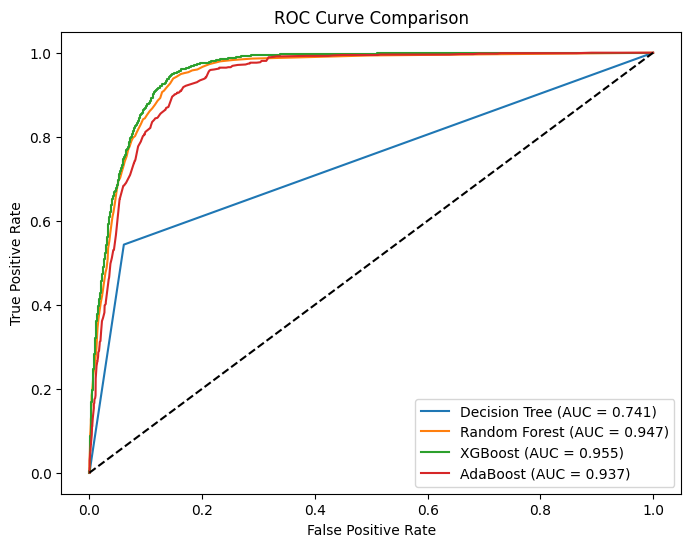

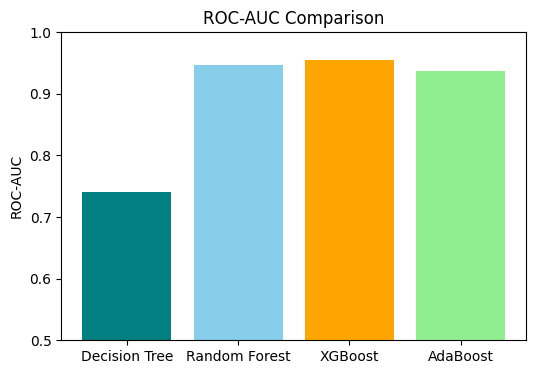

In [34]:
from sklearn.metrics import roc_curve

# ROC Curves
plt.figure(figsize=(8,6))

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.3f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.3f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.3f})')

# AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_score(y_test, y_proba_ada):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Bar plot for ROC-AUC
auc_scores = [
    roc_auc_score(y_test, y_proba_dt),
    roc_auc_score(y_test, y_proba_rf),
    roc_auc_score(y_test, y_proba_xgb),
    roc_auc_score(y_test, y_proba_ada)
]
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost']

plt.figure(figsize=(6,4))
plt.bar(models, auc_scores, color=['teal', 'skyblue', 'orange', 'lightgreen'])
plt.ylabel('ROC-AUC')
plt.ylim(0.5, 1)
plt.title('ROC-AUC Comparison')
plt.show()
